In [ ]:
# apple_market_analysis_inline.py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# =====================
# 1. Load & Clean Data
# =====================
DATA_PATH = "Walmart_customer_fixed.csv"   # adjust if needed

df = pd.read_csv(DATA_PATH, low_memory=False)
print("Original shape:", df.shape)

# Drop duplicates
df = df.drop_duplicates()

# Drop mostly empty columns (>50% NA)
thresh = 0.5 * df.shape[0]
df = df.loc[:, df.isna().sum() <= thresh]

# Convert common fields
if "Purchase_Date" in df.columns:
    df["Purchase_Date"] = pd.to_datetime(df["Purchase_Date"], errors="coerce")
if "Market_Price" in df.columns:
    df["Market_Price"] = pd.to_numeric(df["Market_Price"], errors="coerce")streamlit run app.py
if "Purchase_Amount" in df.columns:
    df["Purchase_Amount"] = pd.to_numeric(df["Purchase_Amount"], errors="coerce")
if "Rating" in df.columns:
    df["Rating"] = pd.to_numeric(df["Rating"], errors="coerce")

# Fill missing
if "Purchase_Amount" in df.columns:
    df["Purchase_Amount"] = df["Purchase_Amount"].fillna(1)

print("✅ Data cleaned successfully")

Original shape: (10000, 27)
✅ Data cleaned successfully


In [8]:
# ===========================
# 2. Focus on Apple products
# ===========================
apple_df = df[df["Brand"].str.lower() == "apple"]
print(f"Apple rows: {apple_df.shape[0]} of {df.shape[0]} "
      f"({100*apple_df.shape[0]/df.shape[0]:.2f}%)")

Apple rows: 213 of 5051 (4.22%)


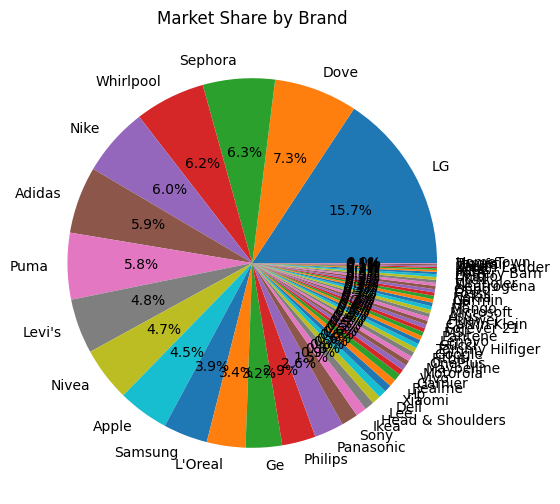

⭐ Apple average rating: 4.23


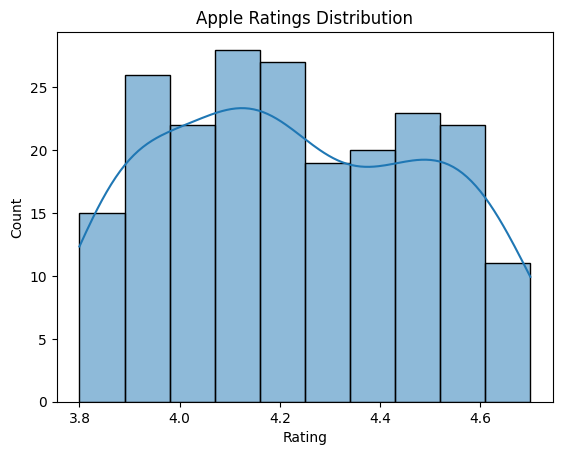

In [10]:
# ===============================
# 3. Market Share Snapshot
# ===============================
if "Brand" in df.columns and "Purchase_Amount" in df.columns:
    brand_share = df.groupby("Brand")["Purchase_Amount"].sum().sort_values(ascending=False)
    brand_share_pct = brand_share / brand_share.sum() * 100

    plt.figure(figsize=(6,6))
    brand_share_pct.plot(kind="pie", autopct="%.1f%%")
    plt.title("Market Share by Brand")
    plt.ylabel("")
    plt.show()

if "Rating" in apple_df.columns:
    avg_rating = apple_df["Rating"].mean()
    print(f"⭐ Apple average rating: {avg_rating:.2f}")
    plt.figure()
    sns.histplot(apple_df["Rating"].dropna(), bins=10, kde=True)
    plt.title("Apple Ratings Distribution")
    plt.show()

🌍 Top 5 Apple cities:
 City
Mollyshire        1202.90
Mirandachester    1114.98
Leestad            862.65
Amandatown         751.25
North Amy          681.62
Name: Purchase_Amount, dtype: float64


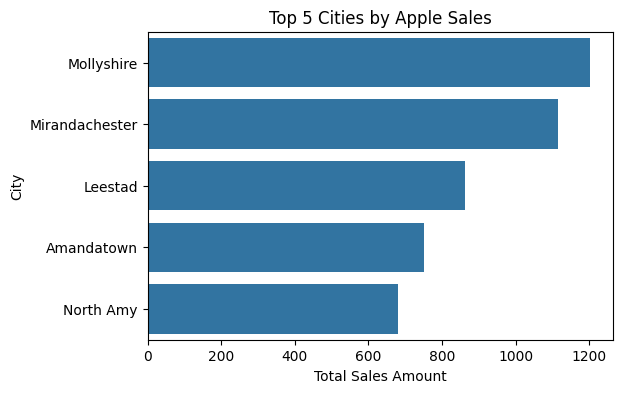

In [11]:
# ===============================
# 4. Geographic Market Insights
# ===============================
if "City" in df.columns and "Purchase_Amount" in df.columns:
    top_cities = apple_df.groupby("City")["Purchase_Amount"].sum().sort_values(ascending=False).head(5)
    print("🌍 Top 5 Apple cities:\n", top_cities)

    plt.figure(figsize=(6,4))
    sns.barplot(x=top_cities.values, y=top_cities.index)
    plt.title("Top 5 Cities by Apple Sales")
    plt.xlabel("Total Sales Amount")
    plt.show()


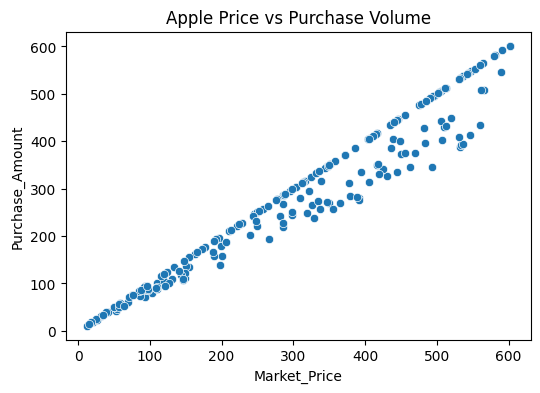

📉 Apple sales with vs without discount:
 Discount_Applied
No     37209.16
Yes    23260.71
Name: Apple, dtype: float64


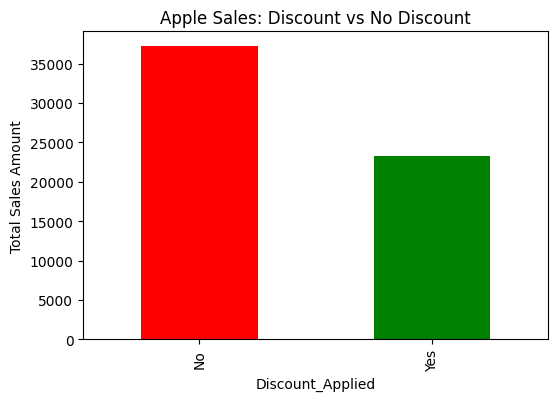

In [12]:
# ===============================
# 5. Price & Discount Sensitivity
# ===============================
if "Market_Price" in apple_df.columns and "Purchase_Amount" in apple_df.columns:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x="Market_Price", y="Purchase_Amount", data=apple_df)
    plt.title("Apple Price vs Purchase Volume")
    plt.show()

if "Discount_Applied" in df.columns:
    disc_sales = df.groupby(["Brand","Discount_Applied"])["Purchase_Amount"].sum().unstack(fill_value=0)
    if "Apple" in disc_sales.index:
        print("📉 Apple sales with vs without discount:\n", disc_sales.loc["Apple"])
        plt.figure(figsize=(6,4))
        apple_disc = disc_sales.loc["Apple"]
        apple_disc.plot(kind="bar", color=["red","green"])
        plt.title("Apple Sales: Discount vs No Discount")
        plt.ylabel("Total Sales Amount")
        plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_3980\97831678.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  apple_monthly = apple_df.groupby(pd.Grouper(key="Purchase_Date", freq="M"))["Purchase_Amount"].sum()


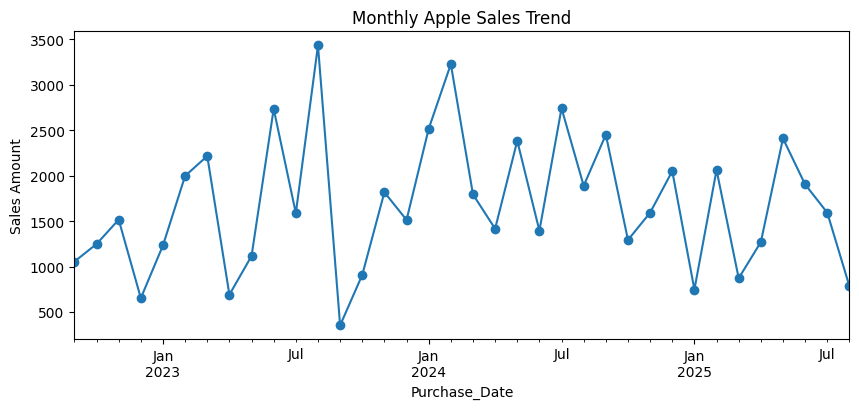

C:\Users\USER\AppData\Local\Temp\ipykernel_3980\97831678.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apple_df["Weekday"] = apple_df["Purchase_Date"].dt.day_name()


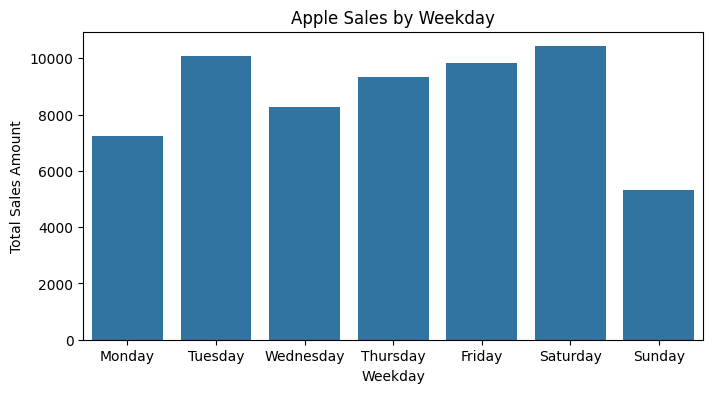

C:\Users\USER\AppData\Local\Temp\ipykernel_3980\97831678.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apple_df["Month"] = apple_df["Purchase_Date"].dt.month
C:\Users\USER\AppData\Local\Temp\ipykernel_3980\97831678.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apple_df["Day"] = apple_df["Purchase_Date"].dt.day
C:\Users\USER\AppData\Local\Temp\ipykernel_3980\97831678.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

🎯 Seasonal Apple Sales:
 Season
Other             49965.64
Back-to-School     8229.30
Christmas          1292.36
New Year            982.57
Name: Purchase_Amount, dtype: float64


C:\Users\USER\AppData\Local\Temp\ipykernel_3980\97831678.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=seasonal_sales.index, y=seasonal_sales.values, palette="Set2")


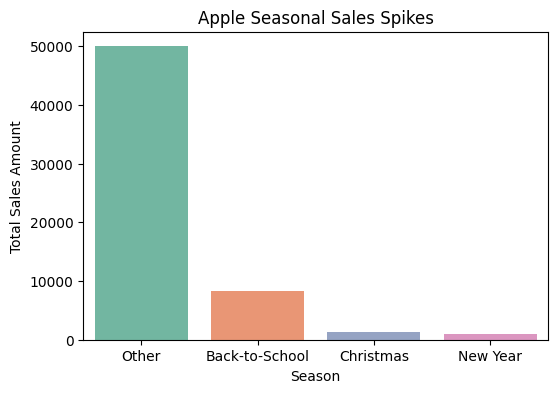

In [16]:
# ===============================
# 6. Time-based Market Trends
# ===============================
if "Purchase_Date" in df.columns and df["Purchase_Date"].notna().any():
    apple_monthly = apple_df.groupby(pd.Grouper(key="Purchase_Date", freq="M"))["Purchase_Amount"].sum()
    plt.figure(figsize=(10,4))
    apple_monthly.plot(marker="o")
    plt.title("Monthly Apple Sales Trend")
    plt.ylabel("Sales Amount")
    plt.show()

    apple_df["Weekday"] = apple_df["Purchase_Date"].dt.day_name()
    weekday_sales = apple_df.groupby("Weekday")["Purchase_Amount"].sum().reindex(
        ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
    )
    plt.figure(figsize=(8,4))
    sns.barplot(x=weekday_sales.index, y=weekday_sales.values)
    plt.title("Apple Sales by Weekday")
    plt.ylabel("Total Sales Amount")
    plt.show()

# ===============================
# 🎯 Seasonal Spikes for Apple
# ===============================
if "Purchase_Date" in df.columns and df["Purchase_Date"].notna().any():
    # Extract month and day for filtering
    apple_df["Month"] = apple_df["Purchase_Date"].dt.month
    apple_df["Day"] = apple_df["Purchase_Date"].dt.day

    def label_season(row):
        m, d = row["Month"], row["Day"]
        if m == 1 and d <= 7:             # New Year
            return "New Year"
        elif m == 12 and d >= 20:         # Christmas
            return "Christmas"
        elif m in [8, 9] and (m == 8 or (m == 9 and d <= 15)):
            return "Back-to-School"
        else:
            return "Other"

    apple_df["Season"] = apple_df.apply(label_season, axis=1)

    # Group by season
    seasonal_sales = apple_df.groupby("Season")["Purchase_Amount"].sum().sort_values(ascending=False)
    print("🎯 Seasonal Apple Sales:\n", seasonal_sales)

    # Plot
    plt.figure(figsize=(6,4))
    sns.barplot(x=seasonal_sales.index, y=seasonal_sales.values, palette="Set2")
    plt.title("Apple Seasonal Sales Spikes")
    plt.ylabel("Total Sales Amount")
    plt.show()
